In [1]:
import os
from dotenv import load_dotenv
#加载 .env文件中的环境变量,保存在代码当前路径下
load_dotenv()
import openai
from langchain_openai import OpenAI
from langchain.schema import AIMessage,SystemMessage,HumanMessage
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
import json

llm= ChatOpenAI(model_name="chatglm3-6b",temperature=0.1)

import chromadb
from chromadb.utils import embedding_functions
# 指定chromadb提供的embedding function使用openai接口能力
bge_embeddings = embedding_functions.OpenAIEmbeddingFunction(
    api_base=os.environ["OPENAI_API_BASE"],
    api_key=os.environ["OPENAI_API_KEY"],
    model_name="bge-large-zh-1.5"
)

In [2]:
#用python内置的with open语句 读写文件是最常见的IO操作
with open("c:\\Users\\lenovo\\生活百科.txt") as file:
    test_text = file.read()

from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter
#用三个回车作为分隔符，将预处理后的文本文件切成小段
text_splitter = CharacterTextSplitter(
    separator = '\n\n\n',
    chunk_size=450,
    chunk_overlap=50,
    length_function=len,
    is_separator_regex=False,
)
chunks = text_splitter.split_text(test_text)

Created a chunk of size 4389, which is longer than the specified 450
Created a chunk of size 537, which is longer than the specified 450
Created a chunk of size 582, which is longer than the specified 450
Created a chunk of size 478, which is longer than the specified 450
Created a chunk of size 651, which is longer than the specified 450
Created a chunk of size 470, which is longer than the specified 450
Created a chunk of size 586, which is longer than the specified 450
Created a chunk of size 692, which is longer than the specified 450
Created a chunk of size 583, which is longer than the specified 450
Created a chunk of size 479, which is longer than the specified 450


Created a chunk of size 510, which is longer than the specified 450
Created a chunk of size 479, which is longer than the specified 450
Created a chunk of size 545, which is longer than the specified 450
Created a chunk of size 556, which is longer than the specified 450
Created a chunk of size 591, which is longer than the specified 450
Created a chunk of size 715, which is longer than the specified 450
Created a chunk of size 556, which is longer than the specified 450
Created a chunk of size 496, which is longer than the specified 450
Created a chunk of size 605, which is longer than the specified 450
Created a chunk of size 533, which is longer than the specified 450
Created a chunk of size 607, which is longer than the specified 450
Created a chunk of size 471, which is longer than the specified 450
Created a chunk of size 475, which is longer than the specified 450
Created a chunk of size 536, which is longer than the specified 450
Created a chunk of size 594, which is longer tha

In [3]:
#创建持久化数据库
dbclient = chromadb.PersistentClient(path="d:\\chromadb")

In [7]:
#测试，如有需要，删除数据库里的实验用cellection，清除之前的实验内容
dbclient.delete_collection("cosine_test")

In [8]:
#将文本块导入向量数据库的名称是“RAG_test”的cellection
cos_collection = dbclient.get_or_create_collection(name="cosine_test", 
                                               metadata={"hnsw:space": "cosine"}, # l2 is the default
                                               embedding_function=bge_embeddings) 

In [9]:
#按chunk排位作为ID
ids=[str(i) for i in range(len(chunks))]

In [10]:
#将原文的文字块存入向量数据库
for i in range(len(chunks)):
    cos_collection.add(
    documents=[chunks[i]],
    metadatas=[{"source": "ENCYCLOPEDIA"}],
    ids=[str(i)]
)

In [11]:
#测试，提取数据库里面的原文信息
_query_results=cos_collection.query(
    query_texts="用微波炉制作菜肴的方法",
    n_results=5,
    include=['documents','embeddings'],
    where={"source": {"$eq": "ENCYCLOPEDIA"}}, # 表示 metadata 中 "source" 字段值等于 "原文" 的文档
    where_document={"$contains": "鸡"}, # 表示文本内容中包含 "鸡" 的文档.
)

for result in _query_results["documents"][0]:
    print(result,"\n______________\n")

#在使用 get 或 query 方法时，您可以使用 include 参数来指定要返回的数据类型，
# 包括 embeddings（嵌入向量）、documents（文档）、metadatas（元数据）以及 query 方法中的 distances（距离）。
# 默认情况下，Chroma 将返回文档、元数据和查询结果的距离（仅针对 query 方法）。由于性能原因，embeddings默认不包含在返回结果中，
# 而 ids 总是会返回。您可以通过将包含要返回字段名称的数组传递给查询或获取方法的 includes 参数来指定要返回的数据类型。
# collection.query({
#     queryEmbeddings: [[11.1, 12.1, 13.1],[1.1, 2.3, 3.2], ...],
#     include: [ "documents" ]
# })

------------

第1节

    :bookben

    附：本作品来自互联网,本人不做任何负责内容版权归作者所有

    “快乐生活一点通”部分内容摘录

    微波炉烹制菊花粥	6

    好喝又滋补的糯米百合粥的做法	7

    啤酒果冻的做法	7

    蓑衣黄瓜的做法	7

    凉粉的制作方法	7

    豉椒鲳鱼	8

    酸辣瓜条	8

    730串烧鸡柳制作法	9

    微波炉嫩蛋羹	9

    微波炉做丝糕	10

    蔬菜蘸酱蚝油甜酱的做法	10

    微波炉**翅	10

    朝鲜冷面的做法	11

    朝鲜泡菜	11

    朝鲜冷面专用的面汁的做法	11

    89豆腐烧鱼	11

    89豆腐饼	12

    810打茄酱	13

    810做凉菜	13

    老北京风味凉菜独咸茄的制作方法	13

    快速制作豆腐脑的方法	14

    蜜汁杏仁豆腐制作法	14

    山药	15

    巧做五味酱	15

    脆皮豆腐	15

    好吃又营养的元宝肉的做法	16

    泡菜炒肥牛的做法	16

    蜜豆	16

    小炸蛋	17

    用微波炉做美容保健粥	17

    什锦泡菜	17

    玉兔什锦菜	18

    百果松糕	18

    椒盐土豆饼	19

    小糖饼	19

    咖喱土豆鸡块	19

    茶水豆腐	20

    珍珠丸子的做法	20

    自制天津小吃“面茶”	20

    四川凉面的做法	21

    油炸冰淇淋	21

    水煮鱼的制作方法	22

    炸酱面	23

    下酒菜麻辣鸡丝拌面皮制作法	23

    美味的五香豆腐肉卷	24

    糊塌子	24

    干烧鱼	25

    巧做农家饼	26

    泡椒凤爪的做法	26

    自制河南冻肉	27

    团圆饼的做法	27

    梅干菜扣肉的制作方法	28

    萝卜丝饼	28

    巴基斯坦小羊腿	29

    巴基斯坦风味香煎鱼块	29

    美味排骨	30

    美味的老人乐	30

    火腿香菇鱼	31

    美味家常蟹	31



In [44]:
#pip install umap-learn 用于将高维数据映射到低维空间，以实现数据降维和可视化。
import umap #是一种非线性降维技术，它能够在保留数据结构的同时将高维数据映射到低维空间
import numpy as np
from tqdm import tqdm
 
embeddings=cos_collection.get(include=['embeddings'])['embeddings']
umap_transform=umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

query_embedding=bge_embeddings(["用微波炉制作菜肴的方法"])
_query_results_embeddings=_query_results['embeddings'][0]


c:\Users\lenovo\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [46]:
#高维向量映射到2维
def project_embeddings(embeddings,umap_transform):
    umap_embeddings=np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i]=umap_transform.transform([embedding])
    return umap_embeddings

In [47]:
project_dataset_embeddings=project_embeddings(embeddings,umap_transform)
project_query_embeddings=project_embeddings(query_embedding,umap_transform)
project_query_results_embeddings=project_embeddings(_query_results_embeddings,umap_transform)

100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


(1.6101165175437928, 9.480934345722199, -1.933596122264862, 7.170412766933441)

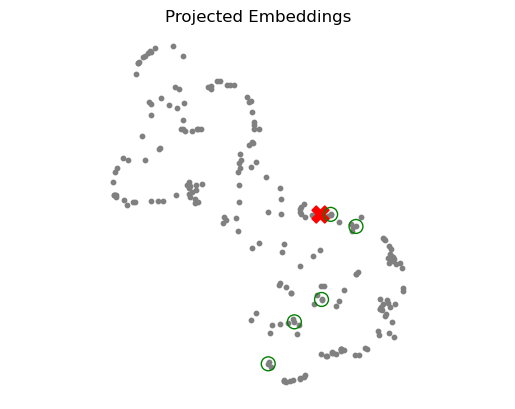

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(project_dataset_embeddings[:,0],project_dataset_embeddings[:,1],s=10,color='grey')
plt.scatter(project_query_embeddings[:,0],project_query_embeddings[:,1],s=150,marker='X', color='r')
plt.scatter(project_query_results_embeddings[:,0],project_query_results_embeddings[:,1],s=100,facecolors='none',edgecolors='g')
plt.gca().set_aspect('equal','datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [53]:
#测试，如有需要，删除数据库里的实验用cellection，清除之前的实验内容
dbclient.delete_collection("l2_test")

In [5]:
l2_collection = dbclient.get_or_create_collection(name="l2_test",embedding_function=bge_embeddings) 

ids=[str(i) for i in range(len(chunks))]

for i in range(len(chunks)):
    l2_collection.add(
    documents=[chunks[i]],
    metadatas=[{"source": "ENCYCLOPEDIA"}],
    ids=[str(i)]
)

_query_results=l2_collection.query(
    query_texts="用微波炉制作菜肴的方法",
    n_results=5,
    include=['documents','embeddings'],
    where={"source": {"$eq": "ENCYCLOPEDIA"}}, # 表示 metadata 中 "source" 字段值等于 "原文" 的文档
    where_document={"$contains": "鸡"}, # 表示文本内容中包含 "鸡" 的文档.
)

for result in _query_results["documents"][0]:
    print(result,"\n______________\n")

Add of existing embedding ID: 0
Insert of existing embedding ID: 0
Add of existing embedding ID: 1
Insert of existing embedding ID: 1
Add of existing embedding ID: 2
Insert of existing embedding ID: 2
Add of existing embedding ID: 3
Insert of existing embedding ID: 3
Add of existing embedding ID: 4
Insert of existing embedding ID: 4
Add of existing embedding ID: 5
Insert of existing embedding ID: 5
Add of existing embedding ID: 6
Insert of existing embedding ID: 6
Add of existing embedding ID: 7
Insert of existing embedding ID: 7
Add of existing embedding ID: 8
Insert of existing embedding ID: 8
Add of existing embedding ID: 9
Insert of existing embedding ID: 9
Add of existing embedding ID: 10
Insert of existing embedding ID: 10
Add of existing embedding ID: 11
Insert of existing embedding ID: 11
Add of existing embedding ID: 12
Insert of existing embedding ID: 12
Add of existing embedding ID: 13
Insert of existing embedding ID: 13
Add of existing embedding ID: 14
Insert of existing em

------------

第1节

    :bookben

    附：本作品来自互联网,本人不做任何负责内容版权归作者所有

    “快乐生活一点通”部分内容摘录

    微波炉烹制菊花粥	6

    好喝又滋补的糯米百合粥的做法	7

    啤酒果冻的做法	7

    蓑衣黄瓜的做法	7

    凉粉的制作方法	7

    豉椒鲳鱼	8

    酸辣瓜条	8

    730串烧鸡柳制作法	9

    微波炉嫩蛋羹	9

    微波炉做丝糕	10

    蔬菜蘸酱蚝油甜酱的做法	10

    微波炉**翅	10

    朝鲜冷面的做法	11

    朝鲜泡菜	11

    朝鲜冷面专用的面汁的做法	11

    89豆腐烧鱼	11

    89豆腐饼	12

    810打茄酱	13

    810做凉菜	13

    老北京风味凉菜独咸茄的制作方法	13

    快速制作豆腐脑的方法	14

    蜜汁杏仁豆腐制作法	14

    山药	15

    巧做五味酱	15

    脆皮豆腐	15

    好吃又营养的元宝肉的做法	16

    泡菜炒肥牛的做法	16

    蜜豆	16

    小炸蛋	17

    用微波炉做美容保健粥	17

    什锦泡菜	17

    玉兔什锦菜	18

    百果松糕	18

    椒盐土豆饼	19

    小糖饼	19

    咖喱土豆鸡块	19

    茶水豆腐	20

    珍珠丸子的做法	20

    自制天津小吃“面茶”	20

    四川凉面的做法	21

    油炸冰淇淋	21

    水煮鱼的制作方法	22

    炸酱面	23

    下酒菜麻辣鸡丝拌面皮制作法	23

    美味的五香豆腐肉卷	24

    糊塌子	24

    干烧鱼	25

    巧做农家饼	26

    泡椒凤爪的做法	26

    自制河南冻肉	27

    团圆饼的做法	27

    梅干菜扣肉的制作方法	28

    萝卜丝饼	28

    巴基斯坦小羊腿	29

    巴基斯坦风味香煎鱼块	29

    美味排骨	30

    美味的老人乐	30

    火腿香菇鱼	31

    美味家常蟹	31



In [55]:
embeddings=l2_collection.get(include=['embeddings'])['embeddings']
umap_transform=umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

query_embedding=bge_embeddings(["用微波炉制作菜肴的方法"])
_query_results_embeddings=_query_results['embeddings'][0]

c:\Users\lenovo\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [56]:
project_dataset_embeddings=project_embeddings(embeddings,umap_transform)
project_query_embeddings=project_embeddings(query_embedding,umap_transform)
project_query_results_embeddings=project_embeddings(_query_results_embeddings,umap_transform)

100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


(2.267700672149658, 11.122546672821045, -0.2535871606320143, 7.394840758666396)

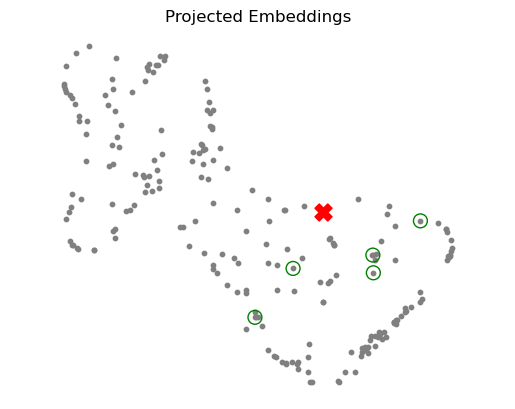

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(project_dataset_embeddings[:,0],project_dataset_embeddings[:,1],s=10,color='grey')
plt.scatter(project_query_embeddings[:,0],project_query_embeddings[:,1],s=150,marker='X', color='r')
plt.scatter(project_query_results_embeddings[:,0],project_query_results_embeddings[:,1],s=100,facecolors='none',edgecolors='g')
plt.gca().set_aspect('equal','datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [9]:
#将文本切分，并保存成document的数据格式
meta_datas = [{"document": 1}]
documents = text_splitter.create_documents(
    [test_text], metadatas=meta_datas
)

Created a chunk of size 4389, which is longer than the specified 450
Created a chunk of size 537, which is longer than the specified 450
Created a chunk of size 582, which is longer than the specified 450
Created a chunk of size 478, which is longer than the specified 450
Created a chunk of size 651, which is longer than the specified 450
Created a chunk of size 470, which is longer than the specified 450
Created a chunk of size 586, which is longer than the specified 450
Created a chunk of size 692, which is longer than the specified 450
Created a chunk of size 583, which is longer than the specified 450
Created a chunk of size 479, which is longer than the specified 450
Created a chunk of size 510, which is longer than the specified 450
Created a chunk of size 479, which is longer than the specified 450
Created a chunk of size 545, which is longer than the specified 450
Created a chunk of size 556, which is longer than the specified 450
Created a chunk of size 591, which is longer th

In [4]:
#将openai的embedding到封装到langchain提供的embedding类里面，链接本地模型
#分别支持字符串的embedding,embed_query,和基于列表的的embedding,embed_documents
from typing import List, Optional
from chromadb.types import Vector
from langchain_core.embeddings import Embeddings
class langchain_EmbeddingFunction(Embeddings):
    def embed_query(self, text: str) -> List[Vector]:
        openai.base_url = 'http://192.168.1.8:8000/v1/'
        self.model="bge-large-zh-1.5"
        db_embeddings = openai.embeddings.create(
            input=[text], model=self.model
            ).data[0].embedding
        return db_embeddings
    def embed_documents(self, texts: List[str]) -> List[List[float]]:
        openai.base_url = 'http://192.168.1.8:8000/v1/'
        self.model="bge-large-zh-1.5"
        db_embeddings = [openai.embeddings.create(
            input=[text], model=self.model
            ).data[0].embedding
            for text in texts
        ]
        return db_embeddings

In [14]:
#langchain提供的多查询检索器
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_community.vectorstores import Chroma
from langchain_core.globals import set_debug
set_debug(True)

vectordb = Chroma.from_documents(documents=documents, embedding=langchain_EmbeddingFunction())
retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectordb.as_retriever(), llm=llm
)
 
question = "用微波炉制作菜肴的方法"
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
 
unique_docs

[chain/start] [1:retriever:Retriever > 2:chain:LLMChain] Entering Chain run with input:
{
  "question": "用微波炉制作菜肴的方法"
}
[llm/start] [1:retriever:Retriever > 2:chain:LLMChain > 3:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: You are an AI language model assistant. Your task is \n    to generate 3 different versions of the given user \n    question to retrieve relevant documents from a vector  database. \n    By generating multiple perspectives on the user question, \n    your goal is to help the user overcome some of the limitations \n    of distance-based similarity search. Provide these alternative \n    questions separated by newlines. Original question: 用微波炉制作菜肴的方法"
  ]
}
[llm/end] [1:retriever:Retriever > 2:chain:LLMChain > 3:llm:ChatOpenAI] [6.91s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "版本1：\n如何使用微波炉制作美食？\n如何利用微波炉烹制佳肴？\n微波炉制作菜谱有哪些技巧？\n\n版本2：\n用微波炉做菜的方法是什么？\n用微波炉烹饪的步骤是什么？\n如何用微波炉制作美味的食物？\n\n版本3：\n微波炉制作菜肴需要注意哪些方面？

[Document(page_content='电脑维护小技巧\n\n    显示屏上什么图标都没有了，这下可闯祸了，还是给服务中心打电话吧维修工程师马上就到了，人家仔细一看就发现了解决问题的方法，其实只要在桌面上点击鼠标右键，选择排列图标里面的显示桌面图标这一项，不见的图标就都回来了，哈哈，问题解决了，那我们再问几个问题吧首先是观众问正确的开机顺序是什么正确的顺序是先启动外部设备，如打印机，扫描仪等设备，然后再启动显示器，最后开主机电源。工程师还建议大家，为了能让电脑操作系统保持良好的运行状态，应该每月进行一次磁盘碎片整理。光盘如果卡在光驱里解决的办法是找一个曲别针，把曲别针弄直，打开舱盖，找到光驱舱门下方的小孔，把小铁丝捅进去，哈哈，光驱弹出来了，用手拉出光驱，光盘就能取出来了。\n\n    打印机墨盒不出墨怎么办呢明明没有过多少就要光荣下岗吗别急，先倒一点温水，把墨盒喷头部分朝下放入温水里，泡三四分钟，然后用干毛巾擦干墨盒，注意喷头部分不用擦，以免损伤喷头，然后再装回打印机，哈哈，打印机又能正常打出漂亮的照片了。\n\n    最后电脑工程师还推荐大家如果再遇到什么电脑问题可以访问电脑厂商的服务网站，在那里有在线的工程师给您解决电脑使用上的问题，让您足不出户自己动手修电脑', metadata={'document': 1}),
 Document(page_content='使音质变坏的cd变好的技巧\n\n    盘面上被划了斜纹，音质变的不好了。我们来教给您使它恢复的技巧。\n\n    听说这是种在孩子们中间颇为流行的方法。其实操作很简单。将音质变坏的cd放入电冰箱2个小时。之后，蒸发掉水分。就好了。当然，划痕很深的话是不行的。\n\n    也许您会问这样做cd为什么会变好我们再做个实验看看。\n\n    先将10个cd人为的弄坏。然后，将它放在20度的冰箱里，结果，有一张恢复的很好。\n\n    cd放在冰箱里就能恢复的方法目前还没找到科学依据。但是，这却是事实，可以说是有效果的。\n\n\n    没有发胶也能固定头发的小窍门\n\n    早上起来，头发乱糟糟的。但是，定发胶又用完了。用碳酸饮料来代替吧。涂上之后，在用吹风机吹，就能定型的很漂亮。\n\n    用碳酸饮料定型，为什么可以代替发胶呢\n\n    实际上，起作用的是碳酸饮料

In [10]:
#pip install rank_bm25 基于query中的词在每个文档中出现的次数对文档进行排序。
#pip install jieba 中文文本分词
from rank_bm25 import BM25Okapi
import jieba

query="用微波炉制作菜肴的方法"
texts_processed = [list(jieba.cut(t)) for t in chunks]
bm25 = BM25Okapi(texts_processed)
query_processed=list(jieba.cut(query))

scores = bm25.get_scores(query_processed)
scores


array([7.81536422, 7.67375938, 4.60263087, 3.72405136, 8.04461084,
       4.66625118, 8.84907426, 8.81096775, 7.49258892, 3.57184589,
       7.6648217 , 2.40870584, 2.35274472, 4.62774518, 3.85420825,
       5.03673688, 3.59801652, 3.3182747 , 6.42377515, 5.01506616,
       6.13138566, 4.4293504 , 2.39867034, 3.98204779, 4.40081131,
       7.53845979, 3.46836063, 4.77968941, 4.21146184, 4.25549117,
       3.11615486, 6.65254176, 2.53089742, 2.52501621, 3.91672248,
       2.37808385, 3.33302459, 5.18637323, 5.25354236, 7.25237648,
       4.23080095, 4.54857374, 4.25436047, 6.15694279, 3.96096527,
       3.68068228, 3.35944547, 2.46110625, 5.87885434, 3.92133334,
       7.13414362, 2.38094262, 3.44786048, 3.7797533 , 2.56542887,
       3.8905822 , 4.60750794, 7.20932712, 4.05476617, 4.09048426,
       4.80227456, 4.15421048, 3.42512635, 6.09899715, 4.16007656,
       4.03166435, 4.01192284, 3.62329857, 4.84061405, 6.65922389,
       2.17905363, 4.06421788, 2.35591327, 4.66625118, 2.47623

In [11]:
import numpy as np
#取得分最高的n个文本段作为结果
n = 3
topn_score_result = np.argpartition(scores, -n)[-n:]
for position in topn_score_result:
    print(chunks[position],"\n______________\n")

豉椒鲳鱼

    材料：鲳鱼、葱、豆豉酱、酒。

    作法：首先将鲳鱼洗净，沥干后在肉面的两侧均匀地划出一些刀口，以便使鱼肉入味。接着把鱼平铺在蒸盘里，在鱼身上淋上1大勺酒，再根据您的口味均匀地淋上几勺豆豉酱，然后放入微波炉用高火蒸10分钟。如果您家里没有微波炉，也可以用蒸锅或者是电锅，所用的时间同样为10分钟。10分钟后，将鱼取出，再在鱼身上撒入一些葱花，葱花的作用一方面可以是肉味更鲜美，另一方面可以装饰鱼身，更能勾起人们的食欲。 
______________

微波炉嫩蛋羹

    蒸蛋羹许多人掌握不好火候，不是蒸老了，就是没熟。用微波炉更不好掌握了。还是接着看朱奶奶怎么做吧。

    其实，蒸鸡蛋羹嫩不嫩的关键，就是往鸡蛋里倒入热水，水和鸡蛋的比率是2比1。接着朝一个方向搅拌均匀。然后，就可以放微波炉里了。放进入时容器上可以不盖盖儿。用高火，加热2分20秒左右。加热后，尽量远离微波炉，因为微波炉有微量的辐射。

    在加热期间，朱奶奶在调制鸡蛋羹的调料。在碗里倒入适量的醋、酱油、香油、胡椒、盐和味精。搅拌均匀。调料做好了，鸡蛋羹也蒸好，拿出来时小心别烫着。然后，朱奶奶，用小刀在鸡蛋羹上，划了几下。乐乐用小勺把鸡蛋羹挖开一些。啊真的很嫩。 
______________

730串烧鸡柳制作法

    原料：鸡腿肉半斤，菠萝2片，蘑菇一两，青椒1个，还有洋葱半个，蒜头2粒。料酒、蒜茸辣酱、生抽、糖、胡椒粉、花生油。

    作法：将蒜切碎，把蒜和料酒、蒜茸辣酱、生抽、糖、胡椒粉还有麻油倒在一个容器里面，把鸡腿肉泡到调好的调料当中，浸泡二十分钟。

    盘子加热之后，在煎盘里倒入一勺量左右的食用油，然后把串好的肉串放入盘子里，然后用烧烤模式下的高火加热五分钟。

    步骤回顾：

    第一步：把鸡腿肉切成两厘米左右的小肉块。

    第二步：把鸡腿肉泡到调好的调料当中，浸泡二十分钟。

    第三步：菠萝、青椒、洋葱和蘑菇切成小方块。

    第四步：以上下是鸡肉，中间是蔬菜的排列方式把原料串在竹签上。

    第五步：将微波炉盘放在微波炉中加热两分钟，之后盘中加一勺油。

    第六步：把串好的肉串放进微波炉高火烘烤五分钟。 
______________



In [5]:
#pip install rank_bm25
#pip install jieba
from langchain.retrievers import EnsembleRetriever
from langchain_community.vectorstores.chroma import Chroma
from langchain_community.retrievers.bm25 import BM25Retriever
import jieba
from typing import TYPE_CHECKING, Any, Callable, Dict, Iterable, List, Optional

def jieba_preprocessing_func(text: str) -> List[str]:
    print(jieba.cut(text))
    return list(jieba.cut(text))


# initialize the bm25 retriever and faiss retriever
## 稀松检索器, 基于关键词的IDF(inverse document frequency)权重
bm25_retriever = BM25Retriever.from_texts(chunks)
bm25_retriever.k = 3
bm25_retriever.preprocess_func= jieba_preprocessing_func
 
## 密集检索器
chroma_collection= Chroma.from_texts(chunks, langchain_EmbeddingFunction())
chroma_retriever = chroma_collection.as_retriever(search_kwargs={"k": 3})
 
# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, chroma_retriever], weights=[0.5, 0.5]
)
 
## 获取数据
docs = ensemble_retriever.get_relevant_documents("用微波炉制作菜肴的方法")
docs


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.035 seconds.
Prefix dict has been built successfully.


[Document(page_content='巧妙祛除锅盖上的油渍：\n\n    只要把锅内加水，锅盖反盖在锅上在火上加热20分钟后，油污就可轻易擦去。这个方法比普通用力擦拭灵的多，但要注意取下锅盖擦拭时注意烫手哦\n\n    :bookben\n\n    附：本作品来自互联网,本人不做任何负责内容版权归作者所有'), Document(page_content='红枣银耳莲子羹\n\n    首先，准备好原料：银耳、莲子、红枣、冰糖。银耳、莲子、红枣需要提前浸泡。\n\n    莲子浸泡的时间要长一些。等莲子都膨胀起来就好了。这样做可以省2倍的煤气。银耳也泡好了。在锅里接上适量的冷水，用手把银耳撕碎放到锅里，银耳发黄的根一定去掉。然后，把莲子也放入锅里。再放入适量的冰糖，可以根据自己的口味多放少放。红枣一定不要先放。\n\n    然后，打开火开始熬。等锅开后，改为小火熬。大约熬40分钟后。看，烫已经差不多粘稠，这时在放入红枣。再熬上10分钟左右就可以了。这样熬出的汤就不会发红了。\n\n    时间到了，红枣银耳莲子羹熬好了，跟普通的做法比较一下，效果是非常明显的。您也快来试试吧。'), Document(page_content='绿豆百合汤的制作方法\n\n    材料：鲜百合，绿豆，冰糖。\n\n    作法：把洗干净的绿豆和百合一同放入锅内，加适量的水，接着用大火将汤煮沸，再改用文火煮。等到绿豆开花百合破烂后再加入适量的冰糖。冰糖溶解后就可以喝了。在这个汤中，绿豆具有清热消暑、利尿消肿、滋润皮肤，润喉止渴的功效。而百合具有润肺、止咳、平喘和清热、养心、安神的功效。是一道夏季很不错的消暑饮品。')] 0.5
[Document(page_content='------------\n\n第1节\n\n    :bookben\n\n    附：本作品来自互联网,本人不做任何负责内容版权归作者所有\n\n    “快乐生活一点通”部分内容摘录\n\n    微波炉烹制菊花粥\t6\n\n    好喝又滋补的糯米百合粥的做法\t7\n\n    啤酒果冻的做法\t7\n\n    蓑衣黄瓜的做法\t7\n\n    凉粉的制作方法\t7\n\n    豉椒鲳鱼\t8\n\n    酸辣瓜条\t8\n\n    730串烧鸡柳制作法\t9\n\n    

[Document(page_content='------------\n\n第1节\n\n    :bookben\n\n    附：本作品来自互联网,本人不做任何负责内容版权归作者所有\n\n    “快乐生活一点通”部分内容摘录\n\n    微波炉烹制菊花粥\t6\n\n    好喝又滋补的糯米百合粥的做法\t7\n\n    啤酒果冻的做法\t7\n\n    蓑衣黄瓜的做法\t7\n\n    凉粉的制作方法\t7\n\n    豉椒鲳鱼\t8\n\n    酸辣瓜条\t8\n\n    730串烧鸡柳制作法\t9\n\n    微波炉嫩蛋羹\t9\n\n    微波炉做丝糕\t10\n\n    蔬菜蘸酱蚝油甜酱的做法\t10\n\n    微波炉**翅\t10\n\n    朝鲜冷面的做法\t11\n\n    朝鲜泡菜\t11\n\n    朝鲜冷面专用的面汁的做法\t11\n\n    89豆腐烧鱼\t11\n\n    89豆腐饼\t12\n\n    810打茄酱\t13\n\n    810做凉菜\t13\n\n    老北京风味凉菜独咸茄的制作方法\t13\n\n    快速制作豆腐脑的方法\t14\n\n    蜜汁杏仁豆腐制作法\t14\n\n    山药\t15\n\n    巧做五味酱\t15\n\n    脆皮豆腐\t15\n\n    好吃又营养的元宝肉的做法\t16\n\n    泡菜炒肥牛的做法\t16\n\n    蜜豆\t16\n\n    小炸蛋\t17\n\n    用微波炉做美容保健粥\t17\n\n    什锦泡菜\t17\n\n    玉兔什锦菜\t18\n\n    百果松糕\t18\n\n    椒盐土豆饼\t19\n\n    小糖饼\t19\n\n    咖喱土豆鸡块\t19\n\n    茶水豆腐\t20\n\n    珍珠丸子的做法\t20\n\n    自制天津小吃“面茶”\t20\n\n    四川凉面的做法\t21\n\n    油炸冰淇淋\t21\n\n    水煮鱼的制作方法\t22\n\n    炸酱面\t23\n\n    下酒菜麻辣鸡丝拌面皮制作法\t23\n\n    美味的五香豆腐肉卷\t24\n\n    糊塌子\t24\n\n    干烧鱼\t25\n\n    巧做农家

In [30]:
# 安装依赖 pip install lark, 能够解析几乎所有的编程语言，在某种程度上也是大多数自然语言。
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
import lark
 
docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
 
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
 
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
 
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
 
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
 
    Document(
        page_content="Three men walk into the Zone, three men walk out of the Zone",
        metadata={
            "year": 1979,"director": "Andrei Tarkovsky","genre": "thriller","rating": 9.9},
    ),
 
]
 
vectorstore = Chroma.from_documents(docs, langchain_EmbeddingFunction())
  
 
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
 
metadata_field_info = [
    AttributeInfo(
        name="genre",
        description="The genre of the movie. One of ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated']",
        type="string",
    ),
    AttributeInfo(
        name="year",
        description="The year the movie was released",
        type="integer",
    ),
    AttributeInfo(
        name="director",
        description="The name of the movie director",
        type="string",
    ),
    AttributeInfo(
        name="rating", description="A 1-10 rating for the movie", type="float"
    ),
]
document_content_description = "Brief summary of a movie"
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info,
    enable_limit=True,
)

In [31]:
from langchain_core.globals import set_debug
set_debug(True)
retriever.invoke("What are two movies about dinosaurs")

[chain/start] [1:retriever:Retriever > 2:chain:query_constructor] Entering Chain run with input:
{
  "query": "What are two movies about dinosaurs"
}
[chain/start] [1:retriever:Retriever > 2:chain:query_constructor > 3:prompt:FewShotPromptTemplate] Entering Prompt run with input:
{
  "query": "What are two movies about dinosaurs"
}
[chain/end] [1:retriever:Retriever > 2:chain:query_constructor > 3:prompt:FewShotPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [1:retriever:Retriever > 2:chain:query_constructor > 4:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Your goal is to structure the user's query to match the request schema provided below.\n\n<< Structured Request Schema >>\nWhen responding use a markdown code snippet with a JSON object formatted in the following schema:\n\n```json\n{\n    \"query\": string \\ text string to compare to document contents\n    \"filter\": string \\ logical condition statement for filtering documents

[Document(page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}),
 Document(page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993})]